In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#Mergesort

In [ ]:
import numpy as np

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    return merge(left_half, right_half)

def merge(left, right):
    sorted_list = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_list.append(left[i])
            i += 1
        else:
            sorted_list.append(right[j])
            j += 1

    while i < len(left):
        sorted_list.append(left[i])
        i += 1

    while j < len(right):
        sorted_list.append(right[j])
        j += 1

    return sorted_list

np.random.seed(42)
arr = np.random.randint(0, 100, size=10)
print("Original Array:", arr)
sorted_arr = merge_sort(arr)
print("Sorted Array: [" + " ".join(map(str, sorted_arr)) + "]")

Original Array: [51 92 14 71 60 20 82 86 74 74]
Sorted Array: [14 20 51 60 71 74 74 82 86 92]


#Randomized Quicksort

In [ ]:
def randomized_quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[random.randint(0, len(arr) - 1)]
        less = [x for x in arr if x < pivot]
        equal = [x for x in arr if x == pivot]
        greater = [x for x in arr if x > pivot]
        return randomized_quicksort(less) + equal + randomized_quicksort(greater)

np.random.seed(42)
random.seed(42)
arr = np.random.randint(0, 100, size=10)
print("Original Array:", arr)
sorted_arr = randomized_quicksort(arr)
print("Sorted Array: [" + " ".join(map(str, sorted_arr)) + "]")

Original Array: [51 92 14 71 60 20 82 86 74 74]
Sorted Array: [14 20 51 60 71 74 74 82 86 92]


#Closest Pair Points

Shortest Distance: 1.9925427395095314
Closest Pair: ((57.91802908162562, 54.21952013742742), (58.367228929122476, 52.278271553195886))


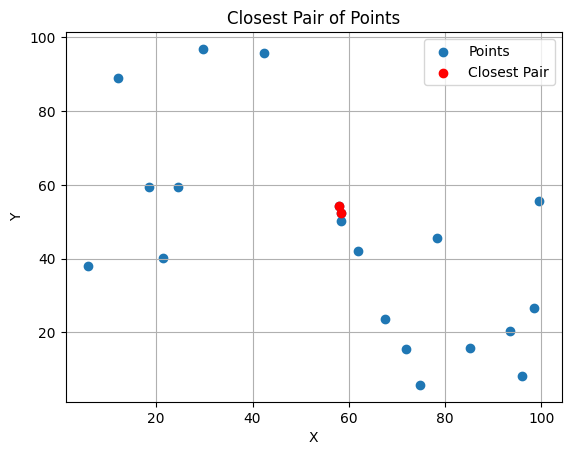

In [24]:
def closest_pair_of_points(points):
    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    def closest_pair_recursive(points_sorted_by_x, points_sorted_by_y):
        n = len(points_sorted_by_x)
        if n <= 3:
            return min((distance(points_sorted_by_x[i], points_sorted_by_x[j]), (points_sorted_by_x[i], points_sorted_by_x[j]))
                       for i in range(n) for j in range(i + 1, n))

        mid = n // 2
        Qx = points_sorted_by_x[:mid]
        Rx = points_sorted_by_x[mid:]
        midpoint = points_sorted_by_x[mid][0]
        Qy = list(filter(lambda x: x[0] <= midpoint, points_sorted_by_y))
        Ry = list(filter(lambda x: x[0] > midpoint, points_sorted_by_y))

        (d1, pair1) = closest_pair_recursive(Qx, Qy)
        (d2, pair2) = closest_pair_recursive(Rx, Ry)

        if d1 <= d2:
            d = d1
            best_pair = pair1
        else:
            d = d2
            best_pair = pair2

        strip = [p for p in points_sorted_by_y if abs(p[0] - midpoint) < d]
        for i in range(len(strip)):
            for j in range(i + 1, min(i + 7, len(strip))):
                p, q = strip[i], strip[j]
                dst = distance(p, q)
                if dst < d:
                    d = dst
                    best_pair = (p, q)

        return d, best_pair

    points_sorted_by_x = sorted(points, key=lambda x: x[0])
    points_sorted_by_y = sorted(points, key=lambda x: x[1])
    return closest_pair_recursive(points_sorted_by_x, points_sorted_by_y)

# Generate random points
def generate_random_points(n, x_range, y_range):
    return [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(n)]

# Example usage
random_points = generate_random_points(20, (0, 100), (0, 100))
distance, closest_points = closest_pair_of_points(random_points)
print("Shortest Distance:", distance)
print("Closest Pair:", closest_points)

# Plot
x, y = zip(*random_points)
plt.scatter(x, y, label='Points')

# Highlight closest pair
px, py = zip(*closest_points)
plt.scatter(px, py, color='red', label='Closest Pair')
plt.plot(px, py, color='red', linestyle='-', linewidth=2)

# Legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Closest Pair of Points')
plt.legend()
plt.grid(True)
plt.show()